# Principal component analysis.

In [8]:
import pandas as pd
import numpy as np

### Importing the dataset train.

In [9]:
train = pd.read_csv('train.csv')
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


## Preparing the models to finding the zscore.

In [10]:
from scipy.stats import zscore
train_features = train.drop(labels = 'critical_temp', axis = 1)
train_features_z = train_features.apply(zscore)
#train_features_z.head()
train_y = train['critical_temp']

In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_features_z, train_y, test_size = 0.3, random_state = 0)

## Fitting the model through a decision tree regressor and predicting the values.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dtregressor = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 3, random_state = 0)
dtregressor.fit(train_features_z, train_y)
y_pred = dtregressor.predict(train_features_z)
dtregressor

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [13]:
y_pred

array([19.49529041, 19.49529041, 29.58133588, ...,  5.64649196,
        5.64649196,  8.66185785])

In [14]:
rmse = np.sqrt(((y_pred - train_y) ** 2).mean()) # Finding the root mean square error.

In [15]:
rmse

14.891777748259557

## Fitting the model and predicting the values using PCA.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
principalComponents = pca.fit_transform(train_features_z)
pdf = pd.DataFrame(data = principalComponents)

In [18]:
pca.explained_variance_ratio_

array([0.38931798, 0.10482209, 0.095212  , 0.0790773 , 0.05882183,
       0.03788369, 0.03622251, 0.03107107, 0.02361113, 0.0197788 ,
       0.01828367, 0.01458597])

In [19]:
pca.explained_variance_ratio_.cumsum() # .cumsum() is used to find the cummulative sum of all the variance ratio values.

array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803])

## Elbow plot.

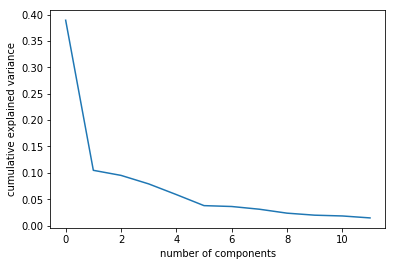

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
dtregressor_new = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 3, random_state = 0)
dtregressor_new.fit(principalComponents, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [22]:
y_pred_new = dtregressor_new.predict(principalComponents)

In [23]:
y_pred_new

array([23.40194682, 57.25950023, 23.40194682, ...,  6.65157707,
        6.65157707,  6.65157707])

In [24]:
rmse1 = np.sqrt(((y_pred_new - train_y) ** 2).mean())

In [25]:
rmse1

16.214214702453962